<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/ETL_minutes_to_five.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import statsmodels.tools.eval_measures as bias
from   sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

In [32]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path = 'https://drive.google.com/uc?export=download&id=' 
URL  = 'https://drive.google.com/file/d/1057_dPk6rIZgXVku8kmZjq3m8WQNkJZb/view?usp=sharing'
df = pd.read_csv(path+URL.split('/')[-2],usecols=[0,1,2,3,4,5,6,7],names=['Date','SERIE1','SERIE2','SERIE3','SERIE4','SERIE5','SERIE6','SERIE7'],
                 dtype={'Date':str,'SERIE1':float,'SERIE2':float,'SERIE3':float,'SERIE4':float,'SERIE5':float,'SERIE6':float,'SERIE7':float}) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
df.dropna(inplace=True)

In [33]:
df['Date'] = pd.to_datetime(df['Date'],format= '%d-%m-%Y %H:%M' ) #.dt.date https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html
df = df.set_index('Date')

In [ ]:
print(df.dtypes)
print(df.head)
print(df)

## Meta-función básica de un periodo

In [ ]:
#from numpy.lib.function_base import append
def persistent(serie,n=1):
    out=[]
    for i in range(n):        
        out.append(serie[len(serie)-1])
    return(out)

In [ ]:
serie=df.SERIE1.tolist()
serie = list(range(100))

In [ ]:
to   = 4  ## Inicio de la posición del periodo de entrenamiento
tt   = 13 ## Inicio de la posición del pronóstico de prueba
tf   = 25 ## Fin de la posición del pronóstico de prueba 
np   = 1  ## Numero de periodos por salto
j=0
forecast=[]
for i in range(tt,tf,np):
    #print(serie[to+j-1:tt+j])
    forecast=forecast+persistent(serie[to+j:tt+j],np)
    j=j+np

In [ ]:
test = serie[tt:tf]
print(forecast)
print(test)

[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
mae_p  = mean_absolute_error(test,forecast)
mape_p = mean_absolute_percentage_error(test,forecast)
biasb   = bias.bias(test,forecast)

In [ ]:
print('mae_p=',mae_p,'mape_p=',mape_p,'bias=',biasb)

mae_p= 1.0 mape_p= 0.056062291628569044 bias= 1.0


## Meta-función básica de n periodos


In [ ]:
to   = 4  ## Inicio de la posición del periodo de entrenamiento
tt   = 13 ## Inicio de la posición del pronóstico de prueba
tf   = 25 ## Fin de la posición del pronóstico de prueba 
np   = 4    ## Numero de periodos por salto
j=0
forecast2=[]
for i in range(tt,tf,np):
    #print(serie[to+j-1:tt+j])
    forecast2=forecast2+persistent(serie[to+j:tt+j],np)
    j=j+np

In [ ]:
test = serie[tt:tf]
print(forecast2)
print(test)

[12, 12, 12, 12, 16, 16, 16, 16, 20, 20, 20, 20]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


## Graficas

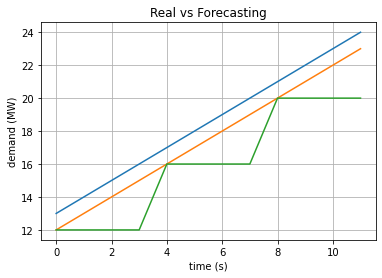

In [ ]:
fig, ax = plt.subplots()
ax.plot(test)
ax.plot(forecast)
ax.plot(forecast2)

ax.set(xlabel='time (s)', ylabel='demand (MW)',
       title='Real vs Forecasting')
ax.grid()

fig.savefig("test.png")
plt.show()
